**Imorting Libraries**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data**

In [51]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Using seaborn to create heat map to see where we are missing data**

In [52]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


**Visualizing the Data**

Text(0.5, 1.0, 'Missing Data Distribution in Titanic Dataset')

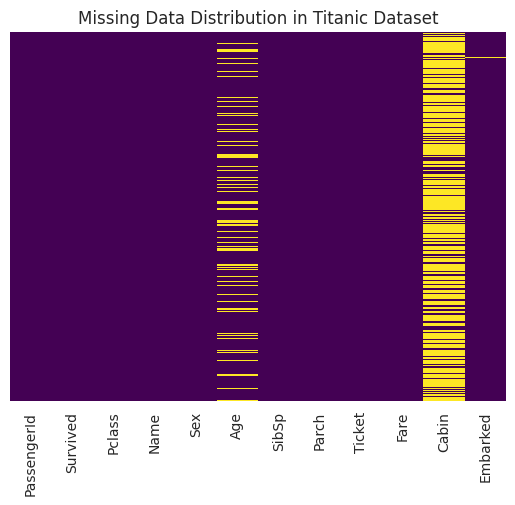

In [53]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Distribution in Titanic Dataset")

Text(0.5, 1.0, 'Survival Count of Passengers')

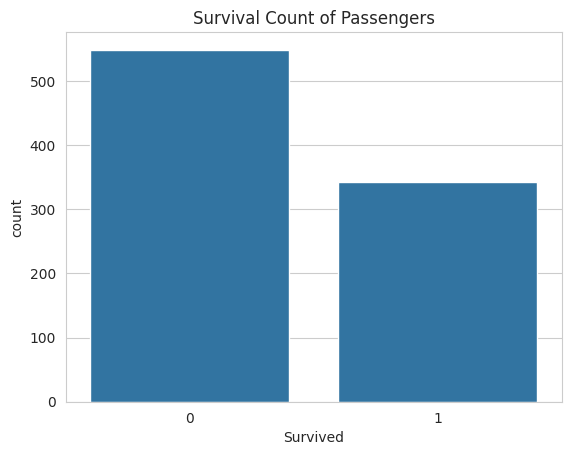

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)
plt.title("Survival Count of Passengers")

Text(0.5, 1.0, 'Number of Survivors and Non-Survivors by Gender')

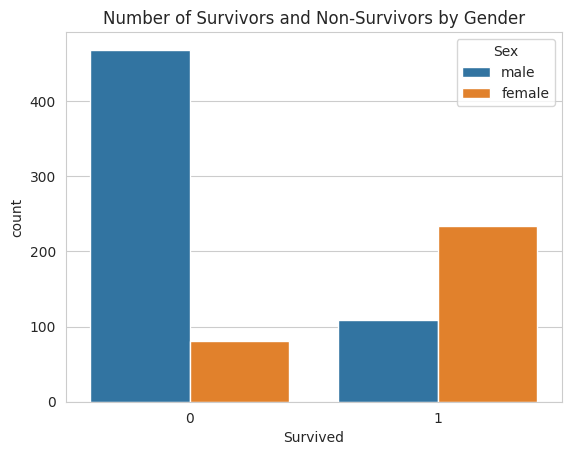

In [55]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Sex')
plt.title("Number of Survivors and Non-Survivors by Gender")

Text(0.5, 1.0, 'Survival Count by Passenger Class')

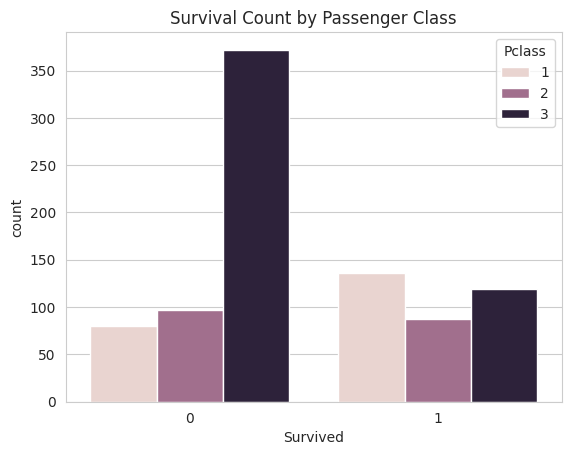

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.title("Survival Count by Passenger Class")

Text(0.5, 1.0, 'Age Distribution of Passengers')

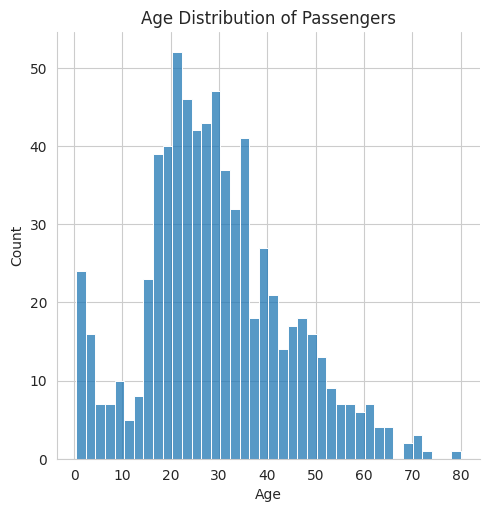

In [57]:
sns.displot(df['Age'].dropna(), kde=False, bins=40)
plt.title("Age Distribution of Passengers")

Text(0.5, 1.0, 'Number of Siblings/Spouses Aboard')

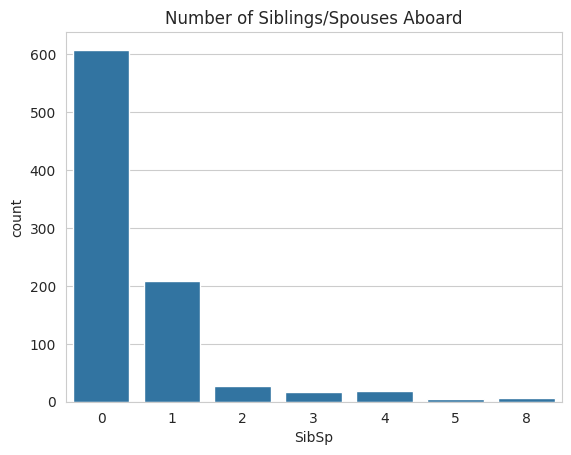

In [58]:
sns.countplot(x='SibSp', data=df)
plt.title("Number of Siblings/Spouses Aboard")

Text(0.5, 1.0, 'Fare Distribution of Passengers')

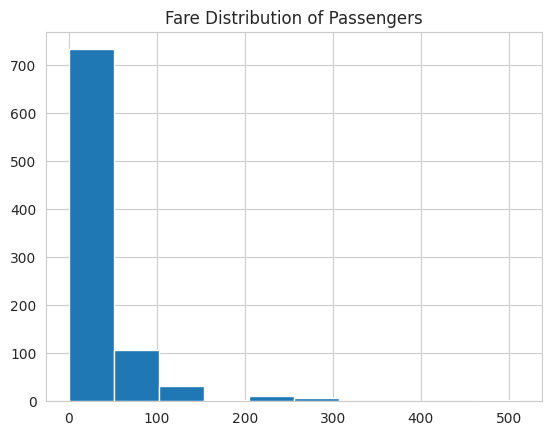

In [59]:
df['Fare'].hist()
plt.title("Fare Distribution of Passengers")

**Data Cleaning**

Text(0.5, 1.0, 'Age Distribution by Passenger Class')

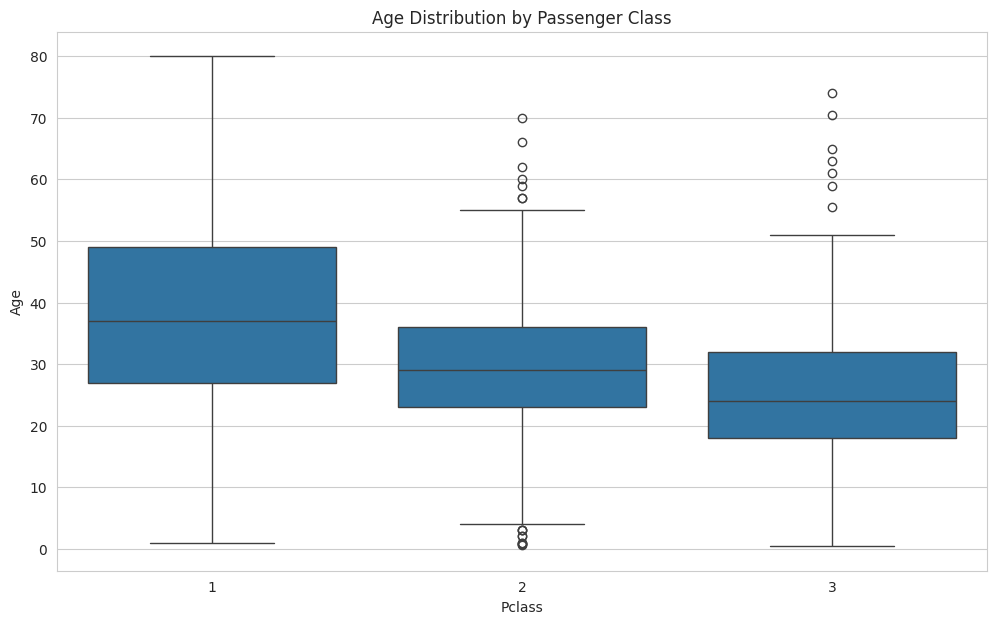

In [60]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df)
plt.title("Age Distribution by Passenger Class")

We use average age values to impute based on Pclass and Age

In [61]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [62]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

/tmp/ipython-input-1334420608.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipython-input-1334420608.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


**Again Ploting Heat Map**

Text(0.5, 1.0, 'Missing Data Distribution in Titanic Dataset')

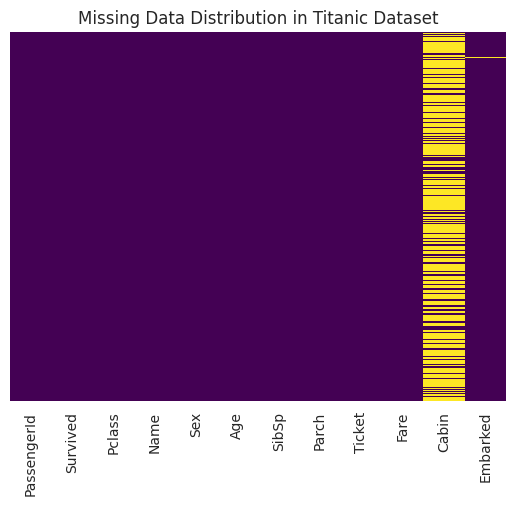

In [63]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Distribution in Titanic Dataset")

Droping Cabin Column

In [64]:
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Text(0.5, 1.0, 'Missing Data Distribution in Titanic Dataset')

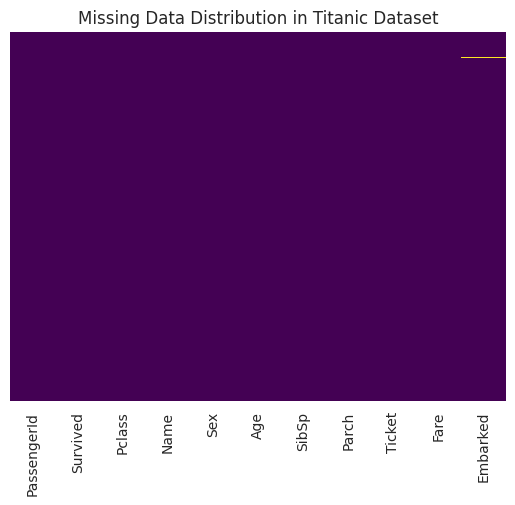

In [65]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Distribution in Titanic Dataset")